In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [2]:
#LIFE EXPECTANCY
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [3]:
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [4]:
WH_USA_df.drop(['Entity'], axis=1, inplace=True)

C:\Users\Beto\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
#Read life expectancy on the world
Unemp_data = pd.read_csv('data/unemployment-rate-OECD.csv')
Unemp_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,A,1967,1.875,NaN
1,AUS,HUR,TOT,PC_LF,A,1968,1.850,NaN
2,AUS,HUR,TOT,PC_LF,A,1969,1.800,NaN
3,AUS,HUR,TOT,PC_LF,A,1970,1.625,NaN
4,AUS,HUR,TOT,PC_LF,A,1971,1.925,NaN


In [6]:
filt=(Unemp_data["LOCATION"]=='USA')
Unemp_USA_df=Unemp_data[filt]
Unemp_USA_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
992,USA,HUR,TOT,PC_LF,A,1955,4.383333,NaN
993,USA,HUR,TOT,PC_LF,A,1956,4.141667,NaN
994,USA,HUR,TOT,PC_LF,A,1957,4.258333,NaN
995,USA,HUR,TOT,PC_LF,A,1958,6.800000,NaN
996,USA,HUR,TOT,PC_LF,A,1959,5.475000,NaN


In [7]:
Unemp_USA_df.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1, inplace=True)

C:\Users\Beto\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
Unemp_USA_df.rename(columns = {'TIME':'Year'}, inplace=True)
Unemp_USA_df.head()

C:\Users\Beto\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,LOCATION,Year,Value
992,USA,1955,4.383333
993,USA,1956,4.141667
994,USA,1957,4.258333
995,USA,1958,6.800000
996,USA,1959,5.475000


In [15]:
data_combined_df=pd.merge(WH_USA_df, Unemp_USA_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Code,Year,Average annual working hours per worker,LOCATION,Value
12,USA,1955,2004.5018,USA,4.383333
13,USA,1956,1989.3650,USA,4.141667
14,USA,1957,1961.5238,USA,4.258333
15,USA,1958,1927.5476,USA,6.800000
16,USA,1959,1952.8529,USA,5.475000
...,...,...,...,...,...
70,USA,2013,1750.0786,USA,7.375000
71,USA,2014,1754.4224,USA,6.166667
72,USA,2015,1765.1826,USA,5.291667
73,USA,2016,1760.7960,USA,4.866667


In [10]:
data_combined_df.shape

(63, 5)

In [16]:
data_combined_df.drop(['LOCATION'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Code':'Country', 'Value':'Unemployment Rate'}, inplace = True) 
data_combined_df.head()

,Country,Year,Average annual working hours per worker,Unemployment Rate
12,USA,1955,2004.5018,4.383333
13,USA,1956,1989.3650,4.141667
14,USA,1957,1961.5238,4.258333
15,USA,1958,1927.5476,6.800000
16,USA,1959,1952.8529,5.475000


In [17]:
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
unemployment=data_combined_df['Unemployment Rate']

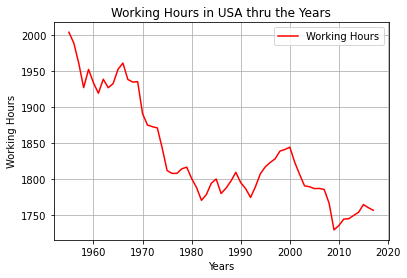

In [18]:
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()

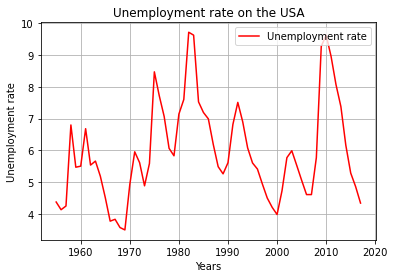

In [20]:

plt.title("Unemployment rate on the USA")
plt.ylabel("Unemployment rate")
plt.xlabel("Years")
plt.plot(years,unemployment, color='red', label="Unemployment rate")
plt.legend(loc="upper right")
plt.grid()